In [7]:
import time
import cv2
import matplotlib.pyplot as plt

from base64 import b64encode
from os import makedirs
from os.path import join, basename
from sys import argv
import json
import requests

## Result of Detection
Here is [Google Cloud Vision API Docs](https://cloud.google.com/vision/docs/)

Cloud Vision API supported extensions.

* JPEG
* PNG8
* PNG24
* GIF
* annimation GIF（just some frames at biginning）
* BMP
* WEBP
* RAW
* ICO

[This Documentation](https://cloud.google.com/vision/docs/quickstart) and [This article](https://www.itbook.info/web/2016/11/google-cloud-vision%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%A6%E3%81%BF%E3%81%9F.html) is very helpful.

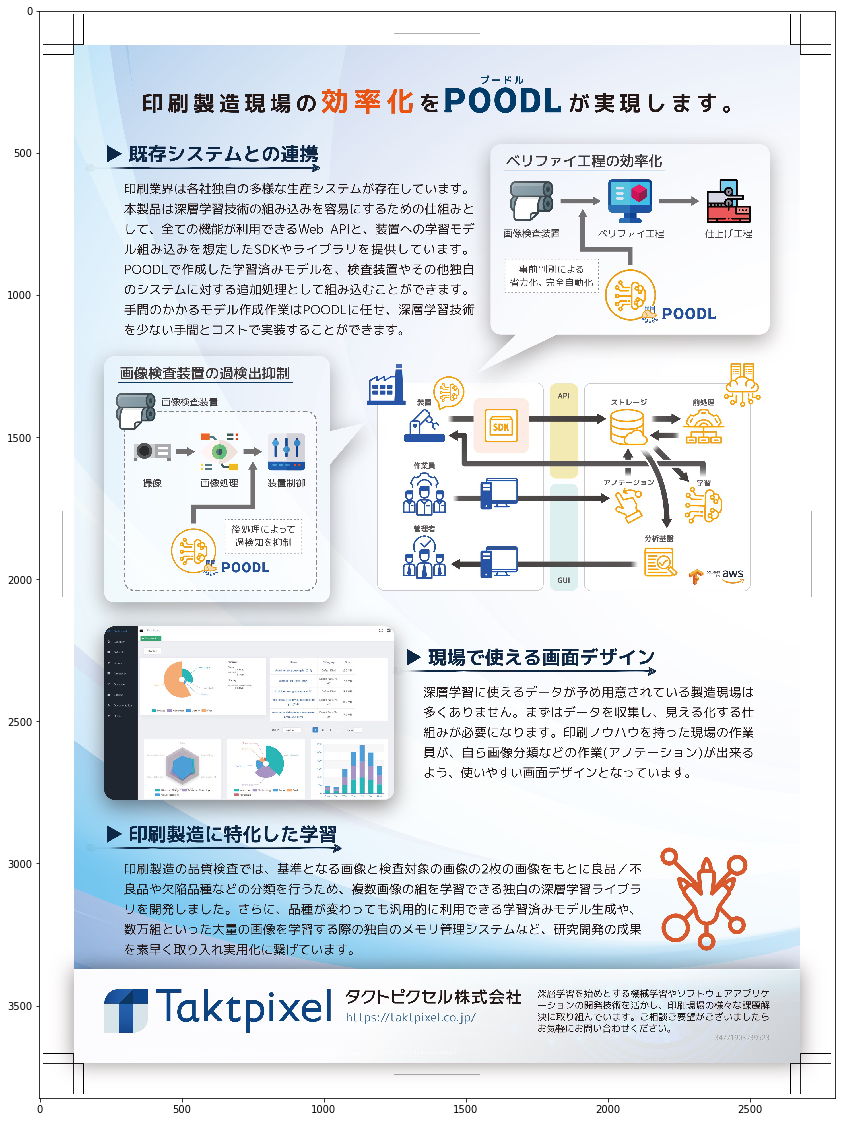

In [8]:
image_path = '../images/POODL_Flyer_Design_ja_190322_back_rgb_300dpi.jpg'
image = cv2.imread(image_path)
org_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.imshow(org_image)

First, We need to create new project at GCP and create API Key.  
Also, you need to accept your ip address.

In [10]:
ENDPOINT_URL = 'https://vision.googleapis.com/v1/images:annotate'
RESULTS_DIR = 'jsons'
#makedirs(RESULTS_DIR)

def make_image_data_list(image_filenames):
    img_requests = []
    for imgname in image_filenames:
        with open(imgname, 'rb') as f:
            ctxt = b64encode(f.read()).decode()
            img_requests.append({
                    'image': {'content': ctxt},
                    'features': [{
                        'type': 'TEXT_DETECTION',
                        'maxResults': 1
                    }]
            })
    return img_requests

def make_image_data(image_filenames):
    imgdict = make_image_data_list(image_filenames)
    return json.dumps({"requests": imgdict }).encode()

def request_ocr(api_key, image_filenames):
    response = requests.post(ENDPOINT_URL,
                            data=make_image_data(image_filenames),
                            params={'key': api_key},
                            headers={'Content-Type': 'application/json'})
    return response

In [13]:
api_key = ''
image_filenames = ['../images/POODL_Flyer_Design_ja_190322_back_rgb_300dpi.jpg']
if not api_key or not image_filenames:
    print('There is not API key or image file')
else:
    response = request_ocr(api_key, image_filenames)
    if response.status_code != 200 or response.json().get('error'):
        print(response.text)
    else:
        for idx, resp in enumerate(response.json()['responses']):
            imgname = image_filenames[idx]
            jpath = join(RESULTS_DIR, basename(imgname) + '.json')
            print(resp['textAnnotations'][0]['description'])

There is not API key or image file


In [4]:
print(pytesseract.image_to_boxes(image, lang="jpn"))

| 122 3703 156 3810 0
ー 1182 3680 1397 3823 0
ト 1316 3718 1478 3818 0
ー 1405 3680 1549 3823 0
~ 120 3668 122 3810 0
印 366 3462 522 3531 0
刷 544 3463 611 3532 0
製 634 3463 704 3531 0
造 724 3463 793 3530 0
現 814 3462 884 3530 0
場 907 3467 946 3526 0
の 916 3432 974 3585 0
効 1040 3461 1083 3549 0
率 1174 3461 1252 3549 0
化 1337 3462 1402 3547 0
を 1433 3465 1472 3551 0
P 1461 3461 1577 3581 0
0 1511 3462 1678 3581 0
O 1652 3461 1673 3581 0
0 1662 3461 1682 3581 0
D 1693 3465 1762 3551 0
L 1778 3465 1836 3551 0
が 1853 3432 1912 3585 0
実 1908 3463 2429 3532 0
現 2121 3432 2237 3585 0
し 2188 3432 2285 3585 0
ま 2236 3432 2332 3585 0
す 2284 3432 2380 3585 0
。 2370 3432 2428 3585 0
~ 1633 3261 2202 3263 0
既 383 3289 499 3351 0
存 461 3255 536 3355 0
シ 521 3292 574 3344 0
ス 586 3291 624 3345 0
テ 653 3293 686 3346 0
ム 636 3255 736 3355 0
と 724 3291 772 3348 0
の 786 3292 843 3345 0
連 851 3288 961 3351 0
携 942 3255 980 3355 0
ベ 1643 3278 1706 3316 0
リ 1706 3273 1732 3314 0
フ 1748 3275 1786 3312 0
ァ 1801

In [5]:
print(pytesseract.image_to_boxes(image, lang="eng+jpn"))

J 122 3703 156 3810 0
ー 1182 3680 1397 3823 0
ト 1316 3718 1478 3818 0
ー 1405 3680 1549 3823 0
プ 1553 3565 1584 3595 0
ー 1593 3576 1621 3581 0
ド 1637 3564 1660 3593 0
ル 1672 3565 1703 3592 0
E 366 3469 397 3531 0
l 399 3463 433 3529 0
刷 499 3462 522 3530 0
製 588 3463 615 3532 0
造 685 3463 704 3531 0
現 726 3462 878 3530 0
場 907 3467 947 3526 0
の 912 3448 981 3558 0
効 1042 3461 1083 3549 0
率 1180 3461 1249 3549 0
化 1324 3462 1402 3547 0
を 1425 3465 1476 3551 0
D 1496 3448 1524 3558 0
B 1517 3448 1531 3558 0
P 1523 3448 1538 3558 0
0 1511 3462 1588 3553 0
0 1601 3462 1678 3553 0
D 1693 3465 1762 3551 0
L 1778 3465 1836 3551 0
が 1908 3480 1930 3530 0
実 1955 3463 2429 3532 0
現 2115 3448 2226 3558 0
し 2170 3448 2281 3558 0
ま 2225 3448 2336 3558 0
す 2280 3448 2391 3558 0
。 2362 3448 2432 3558 0
~ 120 3668 122 3810 0
~ 1633 3260 2202 3264 0
~ 1633 2942 2090 2996 0
~ 1874 2857 1876 2878 0
既 317 3288 980 3351 0
存 453 3274 537 3357 0
シ 495 3274 579 3357 0
ス 542 3274 636 3357 0
テ 588 3274 683 3357 

In [6]:
print(pytesseract.image_to_osd(image))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 17.46
Script: Japanese
Script confidence: 2.24


In [7]:
print(pytesseract.image_to_string(image, lang="eng+jpn"))

J ー ト ー

プ ー ド ル

El 刷 製 造 現 場 の 効 率 化 を DBP00DL が 実 現 し ま す 。

 

 

 

 

既 存 シ ス テ ム と の 連 携 ベ リ フ ァ イ 工 程 の 効 率 化
印 刷 業 界 は 各 社 独 自 の 多 様 な 生 産 シ ス テ ム が 存 在 し て い ま す 。
本 製 品 は 深 層 学 習 技 術 の 組 み 込 み を 容 易 に す る た め の 仕 組 み と 厘 ed LS) ー 虔
し て 、 全 て の 機 能 が 利 用 で き る Web API と 、 装 置 へ の 学 習 モ デ 画 像 検 査 装 置 ベ リ フ ァ イ 工 程 仕 上 げ 工 程
ル 組 み 込 み を 想 定 し た SDK や ラ イ ブ ラ リ を 提 供 し て い ま す 。
POODL で 作 成 し た 学 習 済 み モ デ ル を 、 検 査 装 置 や そ の 他 独 自 ` 事 前 初 刈 に よ る
の シ ス テ ム に 対 す る 追 加 処 理 と し て 組 み 込 む こ と が で き ま す 。 ー
手 間 の か か る モ デ ル 作 成 作 業 は POODL に 任 せ 、 深 層 学 習 技 術 く 飄 POODL

を 少 な い 手 間 と コ ス ト で 実 装 す る こ と が で き ま す 。

画 像 検 査 装 置 の 過 検 出 抑 制 n
el Ge
ま 装 置 “rl ス ト レ ー ジ ame Tol Lo?

 

 

` 後 処 理 に よ っ て ! ! _
` 過 検 知 を 抑 制 SY 分 析 基 盤

… 作 業 員 ・ `「

6 gins ン Mos

! a 一
}}}}}}}}}}}}}}}}}}}}}}} ‥ as 4 S ① 弯

 

 
 
  
 
 
 
 
  

Dataset

   

現 場 で 使 え る 画 面 デ ザ イ ン
・ に ` 深 層 学 習 に 使 え る デ ー タ が 予 め 用 意 さ れ て い る 製 造 現 場 は
`````` ー シ ー シ ー ーー 多 く あ り ま せ ん 。 ま ず は デ ー タ を 収 集 し 、 見 え 

In [8]:
start = time.time()
boxes = pytesseract.image_to_boxes(image, lang="eng+jpn")
print(boxes)
detect_time = time.time() - start
print('detect_time: ', detect_time)

J 122 3703 156 3810 0
ー 1182 3680 1397 3823 0
ト 1316 3718 1478 3818 0
ー 1405 3680 1549 3823 0
プ 1553 3565 1584 3595 0
ー 1593 3576 1621 3581 0
ド 1637 3564 1660 3593 0
ル 1672 3565 1703 3592 0
E 366 3469 397 3531 0
l 399 3463 433 3529 0
刷 499 3462 522 3530 0
製 588 3463 615 3532 0
造 685 3463 704 3531 0
現 726 3462 878 3530 0
場 907 3467 947 3526 0
の 912 3448 981 3558 0
効 1042 3461 1083 3549 0
率 1180 3461 1249 3549 0
化 1324 3462 1402 3547 0
を 1425 3465 1476 3551 0
D 1496 3448 1524 3558 0
B 1517 3448 1531 3558 0
P 1523 3448 1538 3558 0
0 1511 3462 1588 3553 0
0 1601 3462 1678 3553 0
D 1693 3465 1762 3551 0
L 1778 3465 1836 3551 0
が 1908 3480 1930 3530 0
実 1955 3463 2429 3532 0
現 2115 3448 2226 3558 0
し 2170 3448 2281 3558 0
ま 2225 3448 2336 3558 0
す 2280 3448 2391 3558 0
。 2362 3448 2432 3558 0
~ 120 3668 122 3810 0
~ 1633 3260 2202 3264 0
~ 1633 2942 2090 2996 0
~ 1874 2857 1876 2878 0
既 317 3288 980 3351 0
存 453 3274 537 3357 0
シ 495 3274 579 3357 0
ス 542 3274 636 3357 0
テ 588 3274 683 3357 

In [9]:
start = time.time()
data = pytesseract.image_to_data(image, lang="eng+jpn")
print(data)
detect_time = time.time() - start
print('detect_time: ', detect_time)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	2798	3825	-1	
2	1	1	0	0	0	122	7	1427	115	-1	
3	1	1	1	0	0	122	7	1427	115	-1	
4	1	1	1	1	0	122	7	1427	115	-1	
5	1	1	1	1	1	122	15	34	107	46	J
5	1	1	1	1	2	1182	2	215	143	95	ー
5	1	1	1	1	3	1316	7	162	100	85	ト
5	1	1	1	1	4	1405	2	144	143	70	ー
2	1	2	0	0	0	1553	230	150	31	-1	
3	1	2	1	0	0	1553	230	150	31	-1	
4	1	2	1	1	0	1553	230	150	31	-1	
5	1	2	1	1	1	1553	230	31	30	96	プ
5	1	2	1	1	2	1593	244	28	5	95	ー
5	1	2	1	1	3	1637	232	23	29	95	ド
5	1	2	1	1	4	1672	233	31	27	95	ル
2	1	3	0	0	0	366	272	2063	92	-1	
3	1	3	1	0	0	366	272	2063	92	-1	
4	1	3	1	1	0	366	272	2063	92	-1	
5	1	3	1	1	1	366	294	67	68	41	El
5	1	3	1	1	2	499	295	23	68	95	刷
5	1	3	1	1	3	588	293	27	69	96	製
5	1	3	1	1	4	685	294	19	68	87	造
5	1	3	1	1	5	726	295	152	68	87	現
5	1	3	1	1	6	907	299	40	59	94	場
5	1	3	1	1	7	912	267	69	110	96	の
5	1	3	1	1	8	1042	276	41	88	96	効
5	1	3	1	1	9	1180	276	69	88	95	率
5	1	3	1	1	10	1324	278	78	85	90	化
5	1	3	1	1	11	1425	274	51	86	90	

In [10]:
boxes_line = boxes.splitlines()
boxes_info = []
[boxes_info.append(line.split(' ')[1:5]) for line in boxes_line]

int_boxes_info = []
for info in boxes_info:
    box_info = []
    for i in info:
        box_info.append(int(i))
    int_boxes_info.append(box_info)
int_boxes_info

[[122, 3703, 156, 3810],
 [1182, 3680, 1397, 3823],
 [1316, 3718, 1478, 3818],
 [1405, 3680, 1549, 3823],
 [1553, 3565, 1584, 3595],
 [1593, 3576, 1621, 3581],
 [1637, 3564, 1660, 3593],
 [1672, 3565, 1703, 3592],
 [366, 3469, 397, 3531],
 [399, 3463, 433, 3529],
 [499, 3462, 522, 3530],
 [588, 3463, 615, 3532],
 [685, 3463, 704, 3531],
 [726, 3462, 878, 3530],
 [907, 3467, 947, 3526],
 [912, 3448, 981, 3558],
 [1042, 3461, 1083, 3549],
 [1180, 3461, 1249, 3549],
 [1324, 3462, 1402, 3547],
 [1425, 3465, 1476, 3551],
 [1496, 3448, 1524, 3558],
 [1517, 3448, 1531, 3558],
 [1523, 3448, 1538, 3558],
 [1511, 3462, 1588, 3553],
 [1601, 3462, 1678, 3553],
 [1693, 3465, 1762, 3551],
 [1778, 3465, 1836, 3551],
 [1908, 3480, 1930, 3530],
 [1955, 3463, 2429, 3532],
 [2115, 3448, 2226, 3558],
 [2170, 3448, 2281, 3558],
 [2225, 3448, 2336, 3558],
 [2280, 3448, 2391, 3558],
 [2362, 3448, 2432, 3558],
 [120, 3668, 122, 3810],
 [1633, 3260, 2202, 3264],
 [1633, 2942, 2090, 2996],
 [1874, 2857, 1876, 2

## Plot to Image

In [11]:
h, w, _ = image.shape

for b in int_boxes_info:
    image = cv2.rectangle(image, (int(b[0]), h - int(b[1])), (int(b[2]), h - int(b[3])), (0, 255, 0), 2)

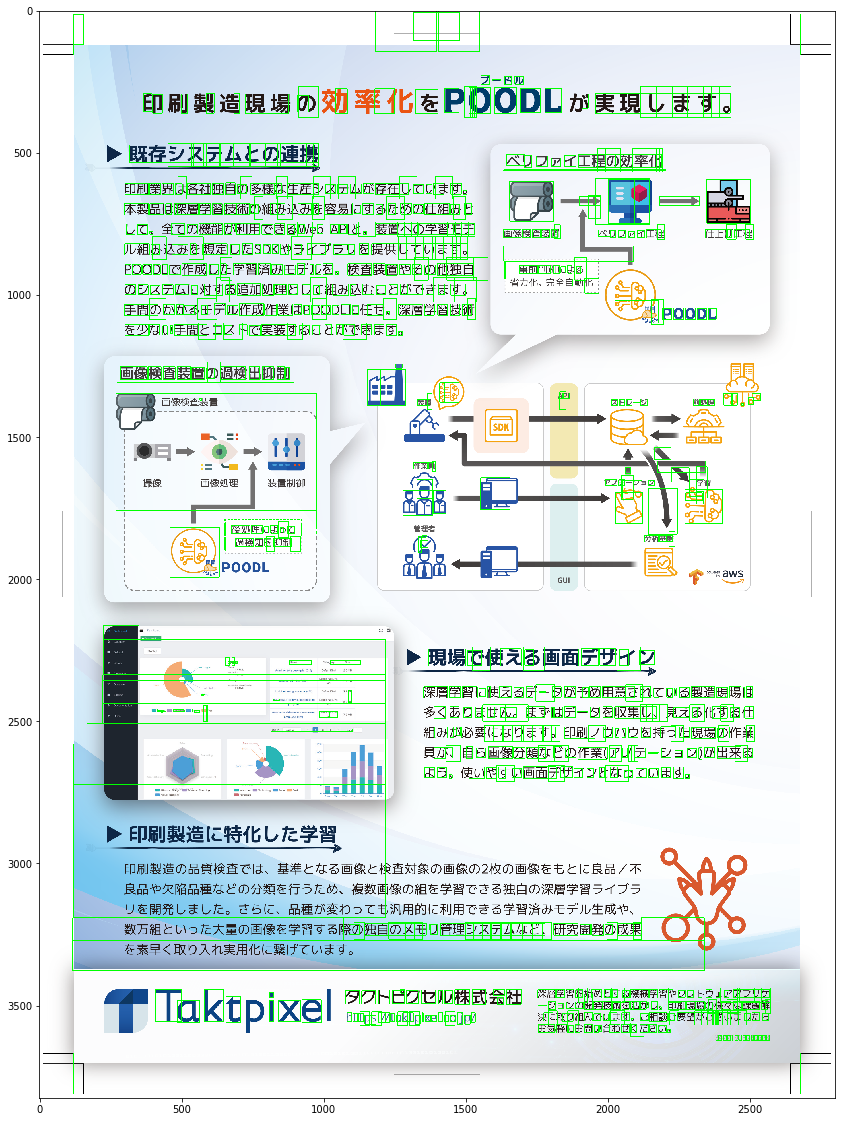

In [12]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.imshow(image)